In [1]:
import os
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def load_images_from_folder(folder_path):
  train_images = []
  train_labels = []
  test_images = []
  test_labels = []
  # at the first iteration want it to catch the train data, and then the test ones at the second
  for iteration, subfolder_1 in enumerate(os.listdir(folder_path)): # train, test
    print(f"Loading from {subfolder_1}:")
    subfolder_1_path = os.path.join(folder_path, subfolder_1)
    for label, subfolder_2 in enumerate(os.listdir(subfolder_1_path)): # ants, bees
      print(f"At iteration {iteration} - {subfolder_1}, {subfolder_2}")
      subfolder_2_path = os.path.join(subfolder_1_path, subfolder_2) 
      for file in os.listdir(subfolder_2_path):
        image_path = os.path.join(subfolder_2_path, file)
        try:
          image = Image.open(image_path).convert('RGB').resize((128, 128))
          image = np.array(image)
          if iteration == 0:
            train_images.append(image)
            train_labels.append(label)
          else:
            test_images.append(image)
            test_labels.append(label)
        except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  return (np.array(train_images), np.array(train_labels)), (np.array(test_images), np.array(test_labels))

In [3]:
# load the images data using the built function
image_path = r'C:\Users\Houcine DG\OneDrive\Bureau\Master Data Science\s3\deep learning medical - Afdel\hymenoptera_data'
(train_images, train_labels), (test_images, test_labels) = load_images_from_folder(image_path)

Loading from train:
At iteration 0 - train, ants
At iteration 0 - train, bees
Loading from val:
At iteration 1 - val, ants
At iteration 1 - val, bees


In [4]:
# print data shapes
print(f"train_images shape: {train_images.shape}, train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}, test_labels shape: {test_labels.shape}")

train_images shape: (245, 128, 128, 3), train_labels shape: (245,)
test_images shape: (153, 128, 128, 3), test_labels shape: (153,)


Text(0.5, 1.0, '0')

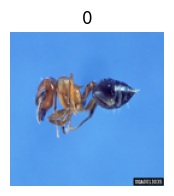

In [5]:
# show the first traing image and its label
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(train_images[0])
plt.title(train_labels[0])

In [6]:
from tensorflow.keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [7]:
train_aug = ImageDataGenerator(
  rotation_range = 30,
  zoom_range = 0.15,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0.15,
  horizontal_flip = True,
  fill_mode = "nearest"
)

val_aug = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
train_aug.mean = mean
val_aug.mean = mean

In [8]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, Input
# from tensorflow.keras.applications import VGG16

# input_shape = (128, 128, 3)
# base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# for layer in base_model.layers:
#   layer.trainable = False
  
# model = Sequential()
# model.add(base_model)
# model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Flatten())
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=2, activation='softmax'))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.applications import VGG16

input_shape = (128, 128, 3)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

for layer in base_model.layers:
  layer.trainable = False
  
model = Sequential()
model.add(base_model)
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax'))


In [10]:
model.compile(
  loss=tensorflow.keras.losses.BinaryCrossentropy(),
  optimizer=tensorflow.keras.optimizers.Adam(),
  metrics=['accuracy'])

In [11]:
history = model.fit(train_aug.flow(train_images, train_labels_one_hot, batch_size=16), epochs=6, validation_data=val_aug.flow(test_images, test_labels_one_hot), shuffle=True)

Epoch 1/6


c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5060 - loss: 4.2873 - val_accuracy: 0.7974 - val_loss: 1.0245
Epoch 2/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7670 - loss: 1.2893 - val_accuracy: 0.8235 - val_loss: 0.7110
Epoch 3/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.8203 - loss: 0.6390 - val_accuracy: 0.8170 - val_loss: 0.5615
Epoch 4/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7900 - loss: 0.5423 - val_accuracy: 0.7908 - val_loss: 0.5539
Epoch 5/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8016 - loss: 0.5891 - val_accuracy: 0.8039 - val_loss: 0.4967
Epoch 6/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8784 - loss: 0.3410 - val_accuracy: 0.8039 - val_loss: 0.5070


Text(0.5, 1.0, 'training accuracy Vs. validation accuracy ')

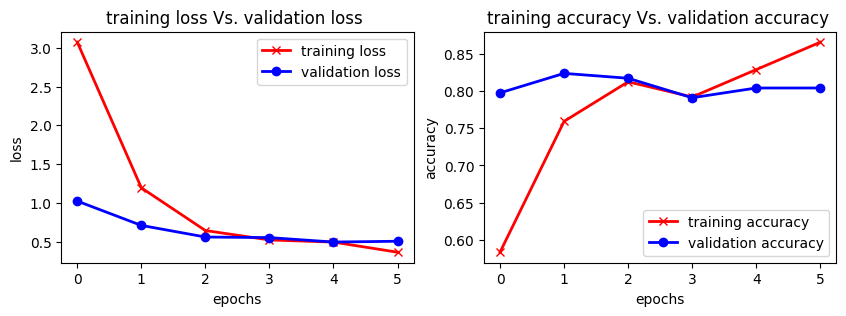

In [12]:
# training curves
# training loss Vs. validation loss 
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], marker='x', color='red', linewidth=2)
plt.plot(history.history['val_loss'], marker='o', color='blue', linewidth=2)
plt.legend(['training loss', 'validation loss'])
plt.title('training loss Vs. validation loss ')
# accuracy
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], marker='x', color='red', linewidth=2)
plt.plot(history.history['val_accuracy'], marker='o', color='blue', linewidth=2)
plt.legend(['training accuracy', 'validation accuracy'])
plt.title('training accuracy Vs. validation accuracy ')

In [13]:
loss, accuracy = model.evaluate(test_images, test_labels_one_hot)

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7884 - loss: 0.5482


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


(-0.5, 127.5, 127.5, -0.5)

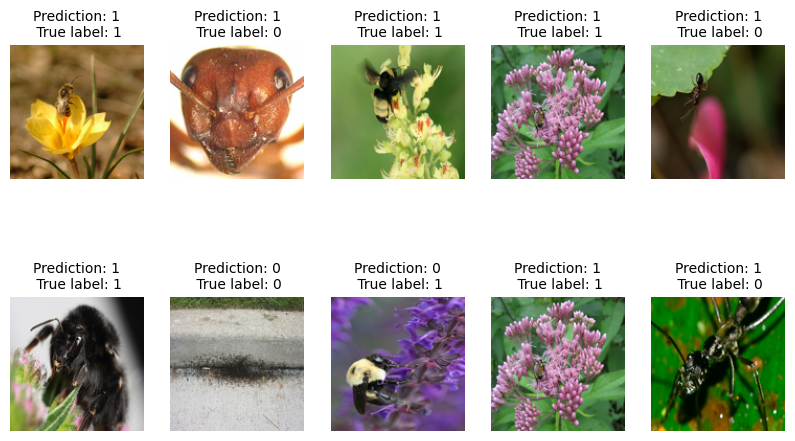

In [14]:
# let's make some predictions
plt.figure(figsize=(10, 6))
for i in range(10):
  rand_index = np.random.randint(len(test_images))
  image_as_batch = test_images[rand_index].reshape(1, 128, 128, 3)
  prediction = np.argmax(model.predict(test_images[[rand_index]]))
  plt.subplot(2, 5, i + 1)
  plt.imshow(test_images[rand_index])
  plt.title(f"Prediction: {prediction}\n True label: {test_labels[rand_index]}", fontsize=10)
  plt.axis('off')
plt.axis('off')
# plt.tight_layout()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = np.argmax(model.predict(test_images), axis=1)
print(classification_report(test_labels, predictions, target_names=['ants', 'bees']))
print(confusion_matrix(test_labels, predictions))

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
              precision    recall  f1-score   support

        ants       0.79      0.79      0.79        70
        bees       0.82      0.82      0.82        83

    accuracy                           0.80       153
   macro avg       0.80      0.80      0.80       153
weighted avg       0.80      0.80      0.80       153

[[55 15]
 [15 68]]
